# Animating

In [1]:
using Interact, Reactive

It is possible to create interactive animations using Reactive's [timing functions](julialang.org/Reactive.jl/api.html#timing).

Functions like `fps`, `fpswhen`, `every` etc, let us create periodically updating signals. This, combined with the other functions in Reactive provide for declarative ways to define animations. Let us now take the n-gon compose example from interactive diagrams notebook and animate it.

Interact.Options{:ToggleButtons,ASCIIString}(Signal{ASCIIString}(yellow, nactions=0),"color","yellow","yellow",Interact.OptionDict(Any["yellow","cyan","tomato"],Dict{Any,Any}("cyan"=>"cyan","yellow"=>"yellow","tomato"=>"tomato")),Any[],Any[])

Interact.Slider{Int64}(Signal{Int64}(11, nactions=0),"n",11,3:20,true)

0.0

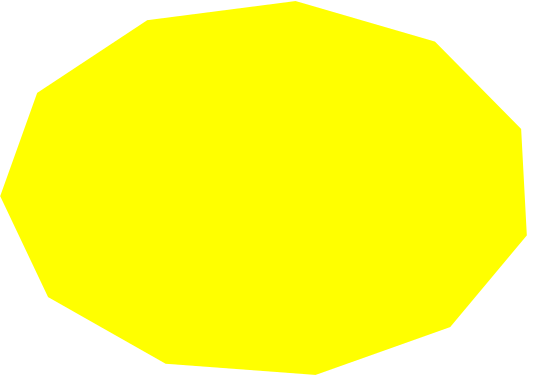

In [6]:
using Colors
using Compose

@manipulate for color=["yellow", "cyan", "tomato"], n=3:20, ticks=fps(30.)
    t = time()
    compose(context(), fill(parse(Colorant, color)),
    polygon([((1+sin(θ+t))/2, (1+cos(θ+t))/2) for θ in 0:2π/n:2π]))
end

It's often advisable to give your animations a pause checkbox. Here is a bouncing ball that you can pause and resume

0.0

0.0

Interact.Slider{Float64}(Signal{Float64}(2.5, nactions=0),"gravity",2.5,0.0:0.01:5.0,true)

Interact.Options{:ToggleButtons,ASCIIString}(Signal{ASCIIString}(tomato, nactions=0),"color","tomato","tomato",Interact.OptionDict(Any["tomato","cyan"],Dict{Any,Any}("cyan"=>"cyan","tomato"=>"tomato")),Any[],Any[])

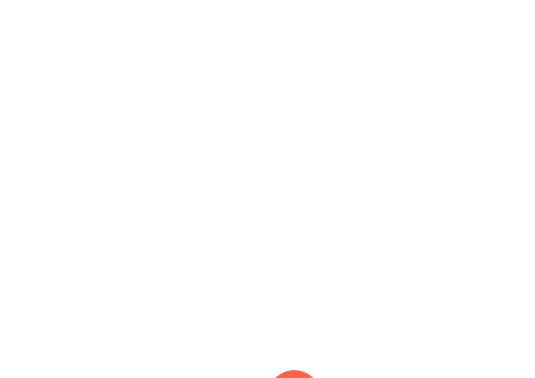

In [8]:
using Compose

@manipulate for 
    dt = fps(30),
    t = foldp(+, 0., dt),                    # add up the time deltas to get time
    gravity = 0:0.01:5,                      # some sort of gravity
    color = ["tomato", "cyan"]               # color the ball

    compose(context(0.5, 1-abs(sin(t*gravity)), 0.1, 0.1), fill(parse(Colorant, color)), circle())
end

Here is a captivating animation made with tiles of varying colors.

Interact.Checkbox(Signal{Bool}(true, nactions=1),"unpaused",true)

0.0

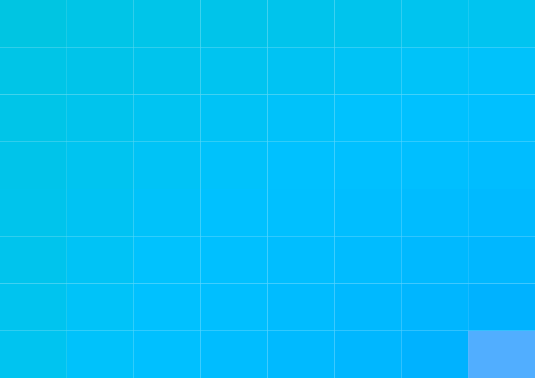

In [12]:
using Colors
using Compose

@manipulate for unpaused = true, ticks=fpswhen(signal(unpaused), 30.)
    gridstack([compose(context(), rectangle(), fill(ColorTypes.LCHab(70.0, 60.0, 100*time()+i*j)))
                   for i in 1:8, j in 1:8])
end

And finally, particles in a box.

0.0

Interact.Button{Void}(Signal{Void}(nothing, nactions=1),"Add particle",nothing)

1-element Array{Any,1}:
 [0.442841,0.860655]

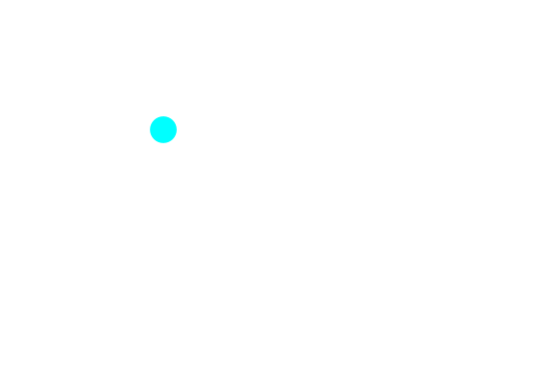

In [15]:
using Compose

box(x) = let i = floor(x)
    i%2==0 ? x-i : 1+i-x
end

colors = ["orange", "cyan", "gray", "tomato"]

dots(points) = [(context(p[1], p[2], .05, .05), fill(parse(Colorant, colors[i%4+1])), circle())
    for (i, p) in enumerate(points)]

@manipulate for ticks=fps(30.), add=button("Add particle"),
    velocities = foldp((x,y) -> push!(x, rand(2)), Any[rand(2)], signal(add))

    compose(context(),
        dots([map(v -> box(v*time()), (vx, vy)) for (vx, vy) in velocities])...)
end

If you used Interact to come up with something cool, do let us know by commenting on [this issue](https://github.com/JuliaLang/Interact.jl/issues/36). :)